# Usage guide
Copyright: Donghu Guo

Author: Donghu Guo

Description: This is the notebook showing the general workflow of how to load and process the original data including: load vtu data, train and test split, standardise the data, create snapshot matrix, etc. See the table of contents for a clearer understanding of the structure of this notebook.

Github Repository: https://github.com/ese-msc-2021/irp-dg321

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import joblib

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
sys.path.append("..")
import tools as t

In [4]:
root_path = '..data/' # set the root path where data is stored

#### Load vtu data

In [ ]:
# read vtu points
filename = root_path + 'Cotrace_fixed/Cotrace_fixed_6.vtu'

mesh = meshio.read(filename)
points = mesh.points
print(points.shape)
print(points[0])

In [5]:
#--------------------------------#
#-- Choose variables           --#
#--------------------------------#
# The path where the vtu files are located
path = root_path + 'Cotrace_fixed_720/' 
# The prefix of the file name of the vtu file
name_simu = 'Cotrace_fixed'
vtu_start = 1
vtu_end   = 721  # 721
vtu_step  = 1
fields_list = ['Tracer', 'Velocity', 'Temperature', 'Humidity', 'Virus1']

In [6]:
times = 720
nNodes = 192060

In [ ]:
tracer = t.loadvtufile(path, name_simu, 'Tracer', vtu_start, vtu_end, vtu_step)
velocity = t.loadvtufile(path, name_simu, 'Velocity', vtu_start, vtu_end, vtu_step)
temp = t.loadvtufile(path, name_simu, 'Temperature', vtu_start, vtu_end, vtu_step)
humid = t.loadvtufile(path, name_simu, 'Humidity', vtu_start, vtu_end, vtu_step)
virus = t.loadvtufile(path, name_simu, 'Virus1', vtu_start, vtu_end, vtu_step)

vx = velocity[:,:,0].reshape(times,nNodes,1)
vy = velocity[:,:,1].reshape(times,nNodes,1)
vz = velocity[:,:,2].reshape(times,nNodes,1)

print(tracer.shape)
print(velocity.shape)
print(temp.shape)
print(humid.shape)
print(virus.shape)
print(vx.shape)

np.save(root_path + 'Cotrace_fixed_720_npys/tracer.npy', tracer)
np.save(root_path + 'Cotrace_fixed_720_npys/velocity.npy', velocity)
np.save(root_path + 'Cotrace_fixed_720_npys/temp.npy', temp)
np.save(root_path + 'Cotrace_fixed_720_npys/humid.npy', humid)
np.save(root_path + 'Cotrace_fixed_720_npys/virus.npy', virus)
np.save(root_path + 'Cotrace_fixed_720_npys/vx.npy', vx)
np.save(root_path + 'Cotrace_fixed_720_npys/vy.npy', vy)
np.save(root_path + 'Cotrace_fixed_720_npys/vz.npy', vz)


## Data exploration

In [5]:
for case in range(1,9):
    tracer = np.load(root_path + 'Cotrace_fixed_720_cases/case{}_npys/case{}_tracer.npy'.format(case,case))
    print(tracer.shape)

(720, 54363, 1)
(720, 54363, 1)
(720, 54363, 1)
(720, 54363, 1)
(720, 54363, 1)
(720, 54363, 1)
(720, 54363, 1)
(720, 54363, 1)


In [60]:

tracer = np.load(root_path + 'Cotrace_fixed_720_cases/case{}_npys/case{}_tracer.npy'.format(case,case))
velocity = np.load(root_path + 'Cotrace_fixed_720_cases/case{}_npys/case{}_velocity.npy'.format(case,case))
temp = np.load(root_path + 'Cotrace_fixed_720_cases/case{}_npys/case{}_temp.npy'.format(case,case))
humid = np.load(root_path + 'Cotrace_fixed_720_cases/case{}_npys/case{}_humid.npy'.format(case,case))
virus = np.load(root_path + 'Cotrace_fixed_720_cases/case{}_npys/case{}_virus.npy'.format(case,case))

vx = np.load(root_path + 'Cotrace_fixed_720_cases/case{}_npys/case{}_vx.npy'.format(case,case))
vy = np.load(root_path + 'Cotrace_fixed_720_cases/case{}_npys/case{}_vy.npy'.format(case,case))
vz = np.load(root_path + 'Cotrace_fixed_720_cases/case{}_npys/case{}_vz.npy'.format(case,case))

In [61]:
print(temp.shape)

(720, 54049, 1)


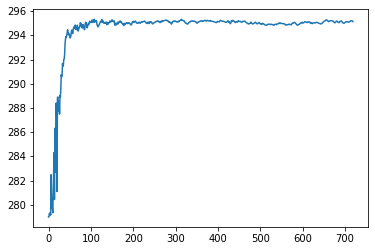

In [62]:
plt.plot(temp[:,30])

In [63]:
fields = [tracer, vx, vy, vz, temp, humid, virus]

In [64]:
fields_list = ['Tracer', 'Velocity_X', 'Velocity_Y', 'Velocity_Z', 'Temperature', 'Humidity', 'Virus1']

In [65]:
print(fields[0].shape)

(720, 54049, 1)


In [66]:
maxs = []
mins = []
for i in range(len(fields)):
    ma = np.amax(fields[i],axis=1)
    mi = np.amin(fields[i],axis=1)
    maxs.append(ma)
    mins.append(mi)


Text(0.5, 0.98, 'Min max values')

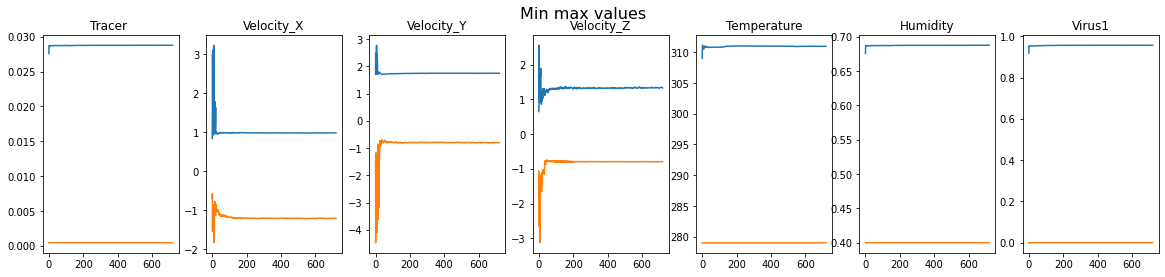

In [67]:
fig, ax = plt.subplots(1,7, figsize=[20,4])
for i in range(len(fields)):
    ax.flatten()[i].plot(maxs[i])
    ax.flatten()[i].plot(mins[i])
    ax.flatten()[i].set_title(fields_list[i])
fig.suptitle('Min max values', fontsize=16)

## Train test split

In [68]:
fields_train = []
fields_test = []
test_t_start = int(720*(100/120))
test_t_end = int(720*(120/120))

print(test_t_start)
print(test_t_end)

600
720


In [69]:
for i in range(len(fields)):
    field_train = fields[i][:test_t_start]
    field_test = fields[i][test_t_start:]
    
    fields_train.append(field_train)
    fields_test.append(field_test)

In [70]:
print(fields[0].shape)
print(fields_train[0].shape)
print(fields_test[0].shape)

(720, 54049, 1)
(600, 54049, 1)
(120, 54049, 1)


In [ ]:
# store train and test sets
joblib.dump(fields, root_path + 'Cotrace_fixed_720_cases/case{}_npys/case{}_fields_all.pkl'.format(case, case))
joblib.dump(fields_train, root_path + 'Cotrace_fixed_720_cases/case{}_npys/case{}_fields_train.pkl'.format(case, case))
joblib.dump(fields_test, root_path + 'Cotrace_fixed_720_cases/case{}_npys/case{}_fields_test.pkl'.format(case, case))

## Standardise the Data 

In [26]:
fields = fields_train
fields_list = ['Tracer ', 'Velocity_X', 'Velocity_Y', 'Velocity_Z', 'Temperature', 'Humidity', 'Virus1']

In [27]:
print(len(fields))
print(fields[0].shape)

7
(600, 192060, 1)


Text(0.5, 0.98, 'histogram before scaling')

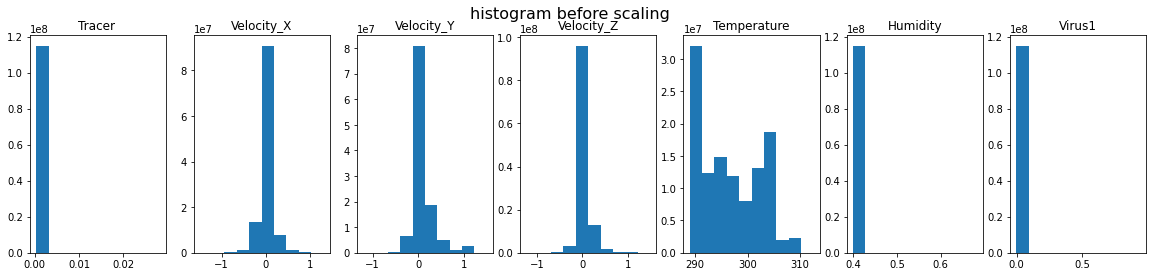

In [28]:
fig, ax = plt.subplots(1,7, figsize=[20,4])
for i in range(len(fields)):
    ax.flatten()[i].hist(fields[i].flatten())
    ax.flatten()[i].set_title(fields_list[i])
fig.suptitle('histogram before scaling', fontsize=16)

In [31]:
# change the output file name
fields_scaled = []
for i in range(len(fields)):
    scaler = MinMaxScaler((0, 1))
    scaler.fit(fields[i][:,:,0])
    field_scaled = scaler.transform(fields[i][:,:, 0])
    joblib.dump(scaler, root_path + 'Cotrace_fixed_720_npys/scalers/train_scaler01_{}.pkl'.format(fields_list[i]))
    print(fields[i].shape)
    print(field_scaled.shape)
    fields_scaled.append(field_scaled)
    

(600, 192060, 1)
(600, 192060)
(600, 192060, 1)
(600, 192060)
(600, 192060, 1)
(600, 192060)
(600, 192060, 1)
(600, 192060)
(600, 192060, 1)
(600, 192060)
(600, 192060, 1)
(600, 192060)
(600, 192060, 1)
(600, 192060)


Text(0.5, 0.98, 'histogram after scaling')

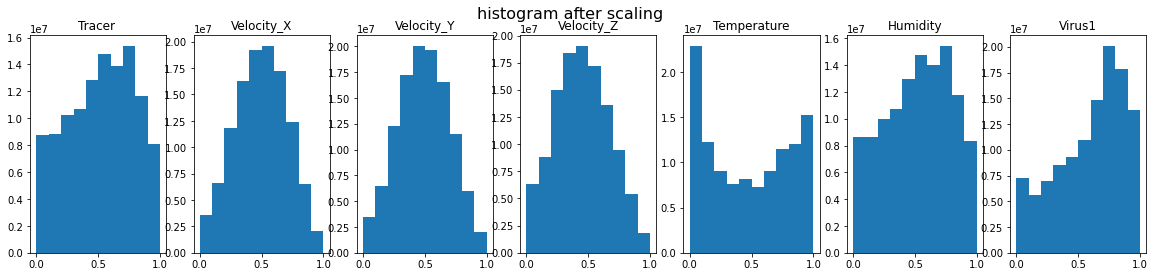

In [32]:
fig, ax = plt.subplots(1,7, figsize=[20,4])
for i in range(len(fields)):
    ax.flatten()[i].hist(fields_scaled[i].flatten())
    ax.flatten()[i].set_title(fields_list[i])
fig.suptitle('histogram after scaling', fontsize=16)

## Create Snapshot Matrix

In [33]:
all_values = np.hstack(fields_scaled)

In [34]:
print("Snapshot Matrix shape", all_values.shape)

Snapshot Matrix shape (600, 1344420)


In [ ]:
# Store the all data in the form of numpy.ndarray
joblib.dump(all_values, root_path + 'Cotrace_fixed_720_npys/train_snapshot_matrix.pkl')

## Load pod coefficients

In [6]:
case = 2
# Load matrix
all_values = joblib.load(
    root_path + 'Cotrace_fixed_720_cases/case{}_npys/case{}_train_snapshot_matrix.pkl'.format(case, case))

In [7]:
# p_tot -> proportion of the variance we want to keep
# Can’t be set to 1, because 1 means that only 1 component will be left
p_tot = 0.9999999999999999 
# Create an instance of the PCA model
pca = PCA(p_tot)
train_pca = pca.fit_transform(all_values)
X_recovered = pca.inverse_transform(train_pca)
np.allclose(X_recovered, all_values)

pca_compress = pca

In [12]:
case = 4

# PCA model
pca_compress = joblib.load(root_path + 'Cotrace_fixed_720_cases/case{}_npys/case{}_train_pca_compress_0.925.pkl'.format(case, case))
# POD coefficients
X_compressed = joblib.load(root_path + 'Cotrace_fixed_720_cases/case{}_npys/case{}_train_pod_coefficients_0.925.pkl'.format(case, case))

# scaler_minmax = MinMaxScaler((0,1))
# X_compressed = scaler_minmax.fit_transform(X_compressed)

In [8]:
print(X_compressed.shape)

(600, 66)


In [11]:
x_com  = pca_compress.fit_transform(all_values)
print(x_com.shape)

(600, 66)


initial number of components =  601
number of components after PCA =  100


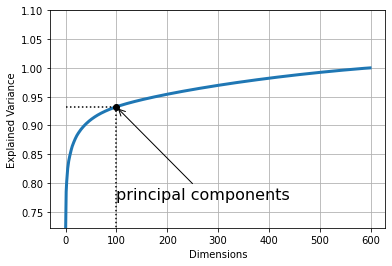

In [14]:
# Find the cumulative sum of the explained variance ratio to plot
p = 0.932
cumsum_eig = np.cumsum(pca_compress.explained_variance_ratio_)
d_tot = pca_compress.n_components_
# Find the number of principle components 
d = np.argmax(cumsum_eig >= p) + 1
print("initial number of components = ", d_tot)
print("number of components after PCA = ", d)

plt.figure(figsize=(6,4))
plt.plot(cumsum_eig, linewidth=3)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.ylim([cumsum_eig[0],1.1])
plt.plot([d, d], [0, p], "k:")
plt.plot([0, d], [p, p], "k:")
plt.plot(d, p, "ko")
plt.annotate("principal components", xy=(d, p), xytext=(d, cumsum_eig[0]+0.05),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.savefig('pca_norm_Explained_Variance.png')
plt.show()

In [ ]:
plt.hist(X_compressed.flatten())
plt.title('histogram of train POD coefficients')
plt.show()

In [ ]:
num_sample = 2

fig, ax = plt.subplots(int(num_sample*0.5),2, figsize=[20,8])
for i in range(num_sample):

    ax.flatten()[i].plot(X_compressed[:,i], '-o')
fig.suptitle('The first {} pod coefficients'.format(num_sample), fontsize=16)

## Data exploration - test set

In [43]:
for i in range(len(fields_test)):
    print(fields_test[i].shape)

(120, 192060, 1)
(120, 192060, 1)
(120, 192060, 1)
(120, 192060, 1)
(120, 192060, 1)
(120, 192060, 1)
(120, 192060, 1)


Text(0.5, 0.98, 'histogram of Test set before scaling')

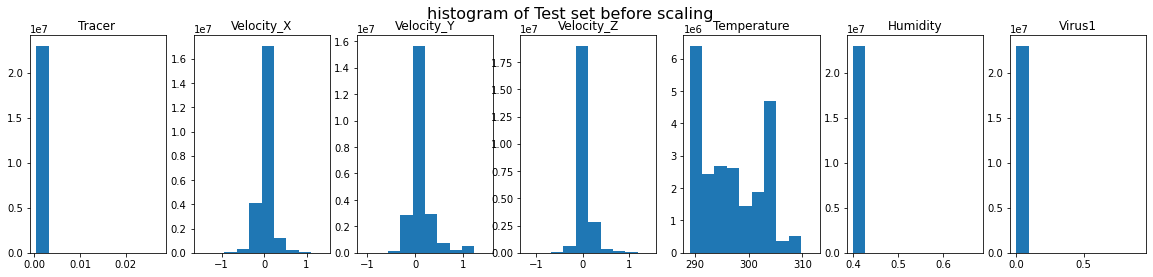

In [44]:
fig, ax = plt.subplots(1,7, figsize=[20,4])
for i in range(len(fields_test)):
    ax.flatten()[i].hist(fields_test[i].flatten())
    ax.flatten()[i].set_title(fields_list[i])
fig.suptitle('histogram of Test set before scaling', fontsize=16)

Text(0.5, 0.98, 'histogram of Test set after scaling')

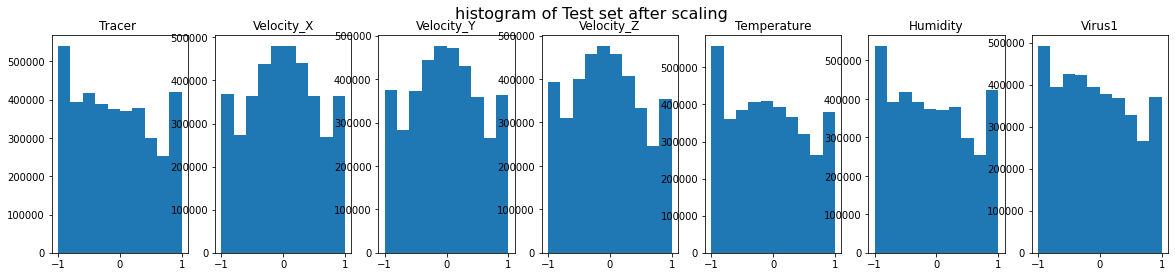

In [11]:
scalers = []
fields_scale = []

for i in range(len(fields_test)):
    scaler = joblib.load(root_path + 'Cotrace_fixed_720_npys/scalers/test_scaler01_' + fields_list[i] + '.pkl')
    field_scale_inverse = scaler.transform(fields_test[i][:,:,0])
    fields_scale.append(field_scale_inverse)

fig, ax = plt.subplots(1,7, figsize=[20,4])
for i in range(len(fields_test)):
    ax.flatten()[i].hist(fields_scale[i].flatten())
    ax.flatten()[i].set_title(fields_list[i])
fig.suptitle('histogram of Test set after scaling', fontsize=16)

Text(0.5, 0.98, 'histogram of Test set after scaling back')

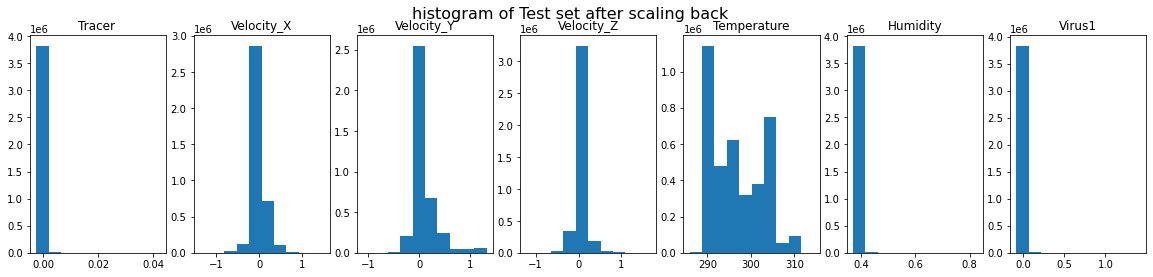

In [12]:
scalers = []
fields_scale_inverse = []

for i in range(len(fields_scale)):
    scaler = joblib.load(root_path + 'toydata/scalers/test_scaler_' + fields_list[i] + '.pkl')
    field_scale_inverse = scaler.inverse_transform(fields_scale[i])
    fields_scale_inverse.append(field_scale_inverse)

fig, ax = plt.subplots(1,7, figsize=[20,4])
for i in range(len(fields_scale)):
    ax.flatten()[i].hist(fields_scale_inverse[i].flatten())
    ax.flatten()[i].set_title(fields_list[i])
fig.suptitle('histogram of Test set after scaling back', fontsize=16)

In [16]:
print(fields_scale_inverse[4][10, :][:10])
print(fields_scale_inverse[4][11, :][:10])
print(fields_scale_inverse[4][19, :][:10])

[288.99999993 293.82400304 289.01426081 289.00632056 289.00976027
 291.46678284 294.80754714 291.93956075 292.31564539 289.14947417]
[288.99999995 293.49081292 289.01417866 289.00581296 289.00914518
 291.34640729 294.60657145 291.7389639  292.21861372 289.10403865]
[289.         293.67358693 289.01183065 289.00515968 289.01505066
 291.33062486 295.33150595 291.7524408  292.06694856 289.14505956]


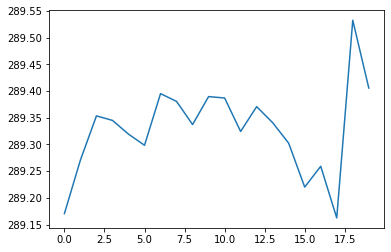

In [19]:
plt.plot(fields_scale_inverse[4][:, 124])